In [1]:
# 導入函式庫
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# 建立簡單的線性執行的模型
model = Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)  

# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

# 預測(prediction)
X = x_Test_norm[0:10,:]
predictions = model.predict_classes(X)
# get prediction result
print(predictions)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.8124 - accuracy: 0.7972 - val_loss: 0.3312 - val_accuracy: 0.9077
Epoch 2/10
 - 0s - loss: 0.3016 - accuracy: 0.9145 - val_loss: 0.2501 - val_accuracy: 0.9334
Epoch 3/10
 - 0s - loss: 0.2368 - accuracy: 0.9337 - val_loss: 0.2046 - val_accuracy: 0.9431
Epoch 4/10
 - 0s - loss: 0.1955 - accuracy: 0.9452 - val_loss: 0.1766 - val_accuracy: 0.9523
Epoch 5/10
 - 0s - loss: 0.1651 - accuracy: 0.9536 - val_loss: 0.1603 - val_accuracy: 0.9556
Epoch 6/10
 - 0s - loss: 0.1427 - accuracy: 0.9599 - val_loss: 0.1440 - val_accuracy: 0.9601
Epoch 7/10
 - 0s - loss: 0.1245 - accuracy: 0.9657 - val_loss: 0.1322 - val_accuracy: 0.9631
Epoch 8/10
 - 0s - loss: 0.1106 - accuracy: 0.9695 - val_loss: 0.1247 - val_accuracy: 0.9645
Epoch 9/10
 - 0s - loss: 0.0983 - accuracy: 0.9734 - val_loss: 0.1164 - val_accuracy: 0.9666
Epoch 10/10
 - 0s - loss: 0.0882 - accuracy: 0.9

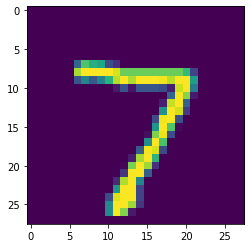

In [2]:
# 顯示 第一筆訓練資料的圖形，確認是否正確
plt.imshow(X_test[0])
plt.show() 

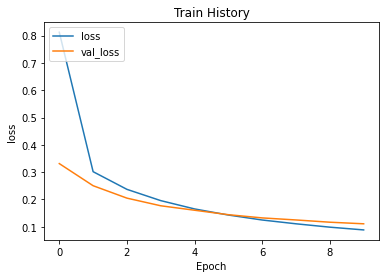

In [3]:
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 